In [11]:
from raytracing import *
import openpyxl
from openpyxl import Workbook

def excel_out(path):
    wb = Workbook()
    ws_fig = wb.create_sheet(title='figure')  # シート名を指定
    ws_ray = wb.create_sheet(title='ray')  # シート名を指定
    ws_ele = wb.create_sheet(title='element')  # シート名を指定    
    
    fig, (axes, axesComments)=plt.subplots(2,1,figsize=(10, 7))
    
    #for ray
    color = ['b', 'r', 'g']

    onlyChiefAndMarginalRays=False
    removeBlockedRaysCompletely=False
    if onlyChiefAndMarginalRays:
        halfHeight = path.objectHeight / 2.0
        chiefRay = path.chiefRay(y=halfHeight - 0.01)
        (marginalUp, marginalDown) = path.marginalRays(y=0)
        rayGroup = (chiefRay, marginalUp)
        linewidth = 1.5
    else:
        halfAngle = path.fanAngle / 2.0
        halfHeight = path.objectHeight / 2.0
        rayGroup = Ray.fanGroup(
            yMin=-halfHeight,
            yMax=halfHeight,
            M=path.rayNumber,
            radianMin=-halfAngle,
            radianMax=halfAngle,
            N=path.fanNumber)
        linewidth = 0.5

    manyRayTraces = path.traceMany(rayGroup)
    ray_num=0 #number of ray
    index=1   #number of excel(ws_ray) row
    for rayTrace in manyRayTraces:
        x = []
        y = []
        ray_num_point=0
        ray_num=ray_num+1
        for ray in rayTrace:
            index=ray_num*7-6           
            if ray_num_point==0:
                ray_num_point=ray_num_point+1
                ws_ray.cell(row=index+0,column=ray_num_point).value="color"
                ws_ray.cell(row=index+1,column=ray_num_point).value="y"
                ws_ray.cell(row=index+2,column=ray_num_point).value="theta"
                ws_ray.cell(row=index+3,column=ray_num_point).value="z"
                ws_ray.cell(row=index+4,column=ray_num_point).value="apertureDiameter"
                ws_ray.cell(row=index+5,column=ray_num_point).value="isBlocked"          
            ray_num_point=ray_num_point+1
            #print(str(ray_num)+" "+str(ray.theta)+" "+str(ray.__dict__))
            ws_ray.cell(row=index+1,column=ray_num_point).value=ray.y
            ws_ray.cell(row=index+2,column=ray_num_point).value=ray.theta
            ws_ray.cell(row=index+3,column=ray_num_point).value=ray.z
            ws_ray.cell(row=index+4,column=ray_num_point).value=ray.apertureDiameter
            ws_ray.cell(row=index+5,column=ray_num_point).value=ray.isBlocked
            if not ray.isBlocked:
                x.append(ray.z)
                y.append(ray.y)
            elif removeBlockedRaysCompletely:
                x = []
                y = []
        (x, y) = path.rearrangeRayTraceForPlotting(
            rayTrace, removeBlockedRaysCompletely)
            
        if len(y) == 0:
            continue  # nothing to plot, ray was fully blocked

        rayInitialHeight = y[0]
        binSize = 2.0 * halfHeight / (len(color) - 1)
        colorIndex = int(
            (rayInitialHeight - (-halfHeight - binSize / 2)) / binSize)
        axes.plot(x, y, color[colorIndex], linewidth=linewidth)
        ws_ray.cell(row=index+0,column=2).value=color[colorIndex]
    plt.savefig("ray.png")
    
    
    #for element
    (xScaling, yScaling) = path.axesToDataScaling(axes)
    arrowWidth = xScaling * 0.01
    arrowHeight = yScaling * 0.03

    transferMatrix = Matrix(A=1, B=0, C=0, D=1)
    matrices = path.transferMatrices()
    ele_num=0 #number of element
    index=1   #number of excel(ws_ele) row
    for element in matrices:
        transferMatrix = element * transferMatrix
        (distance, conjugate) = transferMatrix.forwardConjugate()
        if distance is not None:
            imagePosition = transferMatrix.L + distance        
            if ele_num==0:
                ele_num=ele_num+1
                ws_ele.cell(row=index+0,column=ele_num).value="A"
                ws_ele.cell(row=index+1,column=ele_num).value="B"
                ws_ele.cell(row=index+2,column=ele_num).value="C"
                ws_ele.cell(row=index+3,column=ele_num).value="D"
                ws_ele.cell(row=index+4,column=ele_num).value="physicalLength"
                ws_ele.cell(row=index+5,column=ele_num).value="apertureDiameter"  
                ws_ele.cell(row=index+6,column=ele_num).value="frontVertex"          
                ws_ele.cell(row=index+7,column=ele_num).value="backVertex"          
                ws_ele.cell(row=index+8,column=ele_num).value="frontIndex"          
                ws_ele.cell(row=index+9,column=ele_num).value="backIndex"          
                ws_ele.cell(row=index+10,column=ele_num).value="label"          
                ws_ele.cell(row=index+11,column=ele_num).value="isFlipped"
                ws_ele.cell(row=index+12,column=ele_num).value="imagePosition"
                ws_ele.cell(row=index+13,column=ele_num).value="imageHeight"                             
                ws_ele.cell(row=index+14,column=ele_num).value="magnification"
                ws_ele.cell(row=index+15,column=ele_num).value="focalLength"             
            ele_num=ele_num+1
            ws_ele.cell(row=index+0,column=ele_num).value=element.A
            ws_ele.cell(row=index+1,column=ele_num).value=element.B
            ws_ele.cell(row=index+2,column=ele_num).value=element.C
            ws_ele.cell(row=index+3,column=ele_num).value=element.D
            ws_ele.cell(row=index+4,column=ele_num).value=element.L
            ws_ele.cell(row=index+5,column=ele_num).value=element.apertureDiameter
            ws_ele.cell(row=index+6,column=ele_num).value=element.frontVertex          
            ws_ele.cell(row=index+7,column=ele_num).value=element.backVertex          
            ws_ele.cell(row=index+8,column=ele_num).value=element.frontIndex          
            ws_ele.cell(row=index+9,column=ele_num).value=element.backIndex          
            ws_ele.cell(row=index+10,column=ele_num).value=element.label          
            ws_ele.cell(row=index+11,column=ele_num).value=element.isFlipped
            ws_ele.cell(row=index+12,column=ele_num).value=imagePosition
            if element.C != 0:
                ws_ele.cell(row=index+15,column=ele_num).value=-1.0 / element.C
            else: 
                ws_ele.cell(row=index+15,column=ele_num).value="+inf (afocal)"
            if imagePosition != 0 and conjugate is not None:
                magnification = conjugate.A
                ws_ele.cell(row=index+13,column=ele_num).value=(magnification) * path.objectHeight
                ws_ele.cell(row=index+14,column=ele_num).value=magnification
                axes.arrow(
                    imagePosition,
                    -magnification * path.objectHeight / 2,
                    0,
                    (magnification) * path.objectHeight,
                    width=arrowWidth/5,
                    fc='r',
                    ec='r',
                    head_length=arrowHeight,
                    head_width=arrowWidth,
                    length_includes_head=True)
    ele_num=ele_num+2
    ws_ele.cell(row=index+0,column=ele_num).value=path.A
    ws_ele.cell(row=index+1,column=ele_num).value=path.B
    ws_ele.cell(row=index+2,column=ele_num).value=path.C
    ws_ele.cell(row=index+3,column=ele_num).value=path.D
    ws_ele.cell(row=index+4,column=ele_num).value=path.L
    ws_ele.cell(row=index+5,column=ele_num).value=path.apertureDiameter
    ws_ele.cell(row=index+6,column=ele_num).value=path.frontVertex          
    ws_ele.cell(row=index+7,column=ele_num).value=path.backVertex          
    ws_ele.cell(row=index+8,column=ele_num).value=path.frontIndex          
    ws_ele.cell(row=index+9,column=ele_num).value=path.backIndex          
    ws_ele.cell(row=index+10,column=ele_num).value=path.label          
    ws_ele.cell(row=index+11,column=ele_num).value=path.isFlipped
    #ws_ele.cell(row=index+12,column=ele_num).value=imagePosition
    if element.C != 0:
        ws_ele.cell(row=index+15,column=ele_num).value=-1.0 / path.C
    else: 
        ws_ele.cell(row=index+15,column=ele_num).value="+inf (afocal)"
        
    path.save('Figure.png')
        
    #for figure
    img = openpyxl.drawing.image.Image('Figure.png')
    img_ray = openpyxl.drawing.image.Image('ray.png')

    ws_fig.add_image( img, 'A1' )
    ws_fig.add_image( img_ray, 'A20' )

    wb.save('output.xlsx')


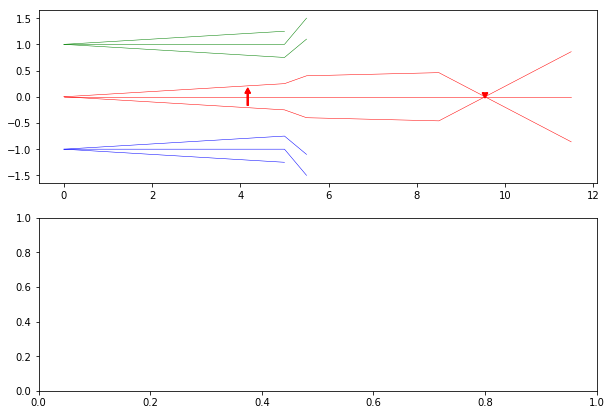

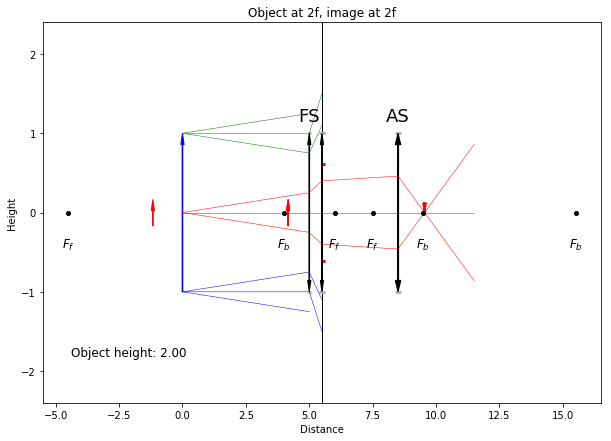

In [12]:
from raytracing import *

FTL_diopter=60
if FTL_diopter==0:
    FTL_diopter=0.0000000000001
FTL_diopter_mm=FTL_diopter*0.01
    
path = ImagingPath()
path.label = "Object at 2f, image at 2f"
path.objectHeight = 2

path.fanAngle = 0.1
path.fanNumber=3
path.rayNumber = 3
path.append(Space(d=5,n=0.34))
#path.append(Lens(f=1/FTL_diopter_mm, diameter=2))
#path.append(Space(d=10))

path.append(Lens(f=-1, diameter=2))

path.append(Space(d=0.5,n=5 ))
path.append(DielectricInterface(n1=1,n2=5))
path.append(Lens(f=10, diameter=2))

#path.append(CurvedMirror(R=2))
path.append(Space(d=3,n=2. ))
path.append(Lens(f=1, diameter=2))
path.append(Space(d=3,n=2. ))

excel_out(path)
